### Задача 8.1

In [277]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import math as mt

%matplotlib inline

In [278]:
theta = 1
theta_5 = 10
lambda_5 = 1
alpha = 0.95
sample_size = 100

#берем количество выборок как можно больше, чтобы вычисленные вероятности были 
#как можно ближе к уровню доверия. Берем 10000, чтобы долго не ждать
num_samples = 10000
n_1 = 10
n_2 = 100

In [279]:
#функция, строящая графики
def ci_plot(theta, sample, sample_size, lower_bound, upper_bound, alpha):
    fig, ax = plt.subplots(figsize=(14,7))
    #истинное значение theta
    ax.axhline(theta, color='green')
    #интервал
    ax.fill_between(np.arange(1, sample_size + 1), lower_bound(sample, alpha), 
                    upper_bound(sample, alpha), color='orange')
    plt.grid(ls=':')
    plt.show()

#оценка вероятности попадания истинного значения theta в интервал
#type_ - тип распределения (по номеру задачи)
def probability_estimate(num_samples, sample_size, theta, alpha, n_1, n_2, type_):
    samples = np.zeros((num_samples, sample_size))
    lower_bounds_n_1 = np.zeros(num_samples)
    upper_bounds_n_1 = np.zeros(num_samples)
    lower_bounds_n_2 = np.zeros(num_samples)
    upper_bounds_n_2 = np.zeros(num_samples)

    for i in range(num_samples):
        #генерируем распределения
        if type_ == 1:
            samples[i] = sps.uniform.rvs(0, theta, sample_size)
        elif type_ == 3:
            samples[i] = sps.cauchy.rvs(theta, 1, sample_size)
        elif type_ == 4:
            samples[i] = sps.poisson.rvs(theta, size=sample_size)
        #считаем интервалы
        lower_bounds_n_1[i] = lower_bound(samples[i], alpha, n_1)
        upper_bounds_n_1[i] = upper_bound(samples[i], alpha, n_1)
        lower_bounds_n_2[i] = lower_bound(samples[i], alpha, n_2)
        upper_bounds_n_2[i] = upper_bound(samples[i], alpha, n_2)

    #массивы bool: 1 - theta попала в инт., 0 - иначе                                                
    interval_hit_n_1 = np.zeros(num_samples)
    interval_hit_n_2 = np.zeros(num_samples)
    for i in range(num_samples):
        interval_hit_n_1[i] = (theta >= lower_bounds_n_1[i] and 
                               theta <= upper_bounds_n_1[i])
        interval_hit_n_2[i] = (theta >= lower_bounds_n_2[i] and 
                               theta <= upper_bounds_n_2[i])

    print('Вероятность попадания истинного значения параметра в интервал:')
    print(('  p = {} при n = {}').format(np.mean(interval_hit_n_1), n_1))
    print(('  p = {} при n = {}').format(np.mean(interval_hit_n_2), n_2))

#### Задача 1: $X_1 \dots X_{100} \sim R[0, \theta\,]$

Доверительный интервал для статистики $\overline{X}$: $\theta \in \left( \frac{\overline{X}}{\frac{1}{2} + \varepsilon}, \: \frac{\overline{X}}{\frac{1}{2} - \varepsilon} \right), \: \text{где} \: \varepsilon=\sqrt{\frac{1}{12\cdot(1-\alpha)\cdot n}}$

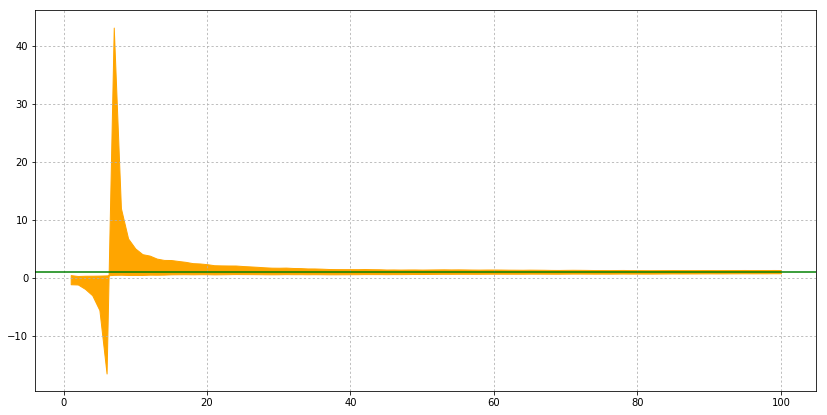

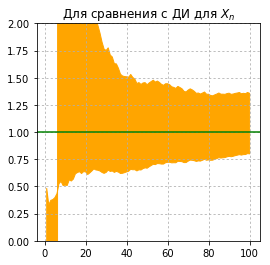

Вероятность попадания истинного значения параметра в интервал:
  p = 1.0 при n = 10
  p = 1.0 при n = 100


In [289]:
#считают нижнюю и верхнюю границы соответсвенно, либо для всех i <= len(sample)
#либо для конкретного i=n
def lower_bound(sample, alpha, n=0):
    if n:
        return np.mean(sample[:n]) / (0.5 + np.sqrt(1 / (12 * (1 - alpha) * n)))
    else:
        return np.array([np.mean(sample[:i]) / 
                         (0.5 + np.sqrt(1 / (12 * (1 - alpha) * i)))
                             for i in range(1, len(sample) + 1)])

def upper_bound(sample, alpha, n=0):
    if n:
        return np.mean(sample[:n]) / (0.5 - np.sqrt(1 / (12 * (1 - alpha) * n)))
    else:
        return np.array([np.mean(sample[:i]) / (
                        0.5 - np.sqrt(1 / (12 * (1 - alpha) * i)))
                             for i in range(1, len(sample) + 1)])
                                                
#выборка
sample = sps.uniform.rvs(0, theta, sample_size)

#строим доверительный интервал
ci_plot(theta, sample, sample_size, lower_bound, upper_bound, alpha)

fig, ax = plt.subplots(figsize=(4,4))
ax.axhline(theta, color='green')
ax.fill_between(np.arange(1, sample_size + 1), lower_bound(sample, alpha), 
                upper_bound(sample, alpha), color='orange')
plt.ylim(0, 2)
plt.title('Для сравнения с ДИ для ${X_n}$')
plt.grid(ls=':')
plt.show()
                            
probability_estimate(num_samples, sample_size, theta, alpha, n_1, n_2, 1)

Доверительный интервал для статистики $X_{(1)}$: $\theta \in \left(0\,, \frac{X_{(1)}}{1-\sqrt[n]{\alpha}} \right)$

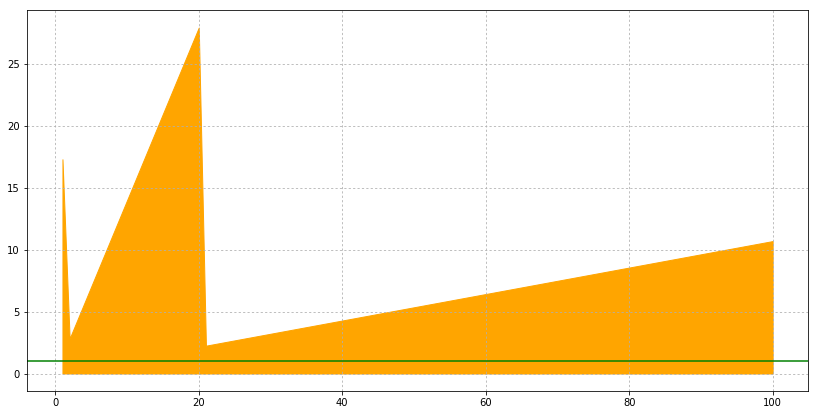

Вероятность попадания истинного значения параметра в интервал:
  p = 0.9477 при n = 10
  p = 0.952 при n = 100


In [290]:
def lower_bound(sample, alpha, n=0):
    if n:
        return 0
    else:
        return np.zeros(len(sample))

def upper_bound(sample, alpha, n=0):
    if n:
        return np.min(sample[:n]) / (1 - mt.pow(alpha, 1 / n))
    else:
        return np.array([np.min(sample[:i]) / (1 - mt.pow(alpha, 1 / i))
                             for i in range(1, len(sample) + 1)])
                                                
#используем ту же самую выборку

ci_plot(theta, sample, sample_size, lower_bound, upper_bound, alpha)

probability_estimate(num_samples, sample_size, theta, alpha, n_1, n_2, 1)

Доверительный интервал для статистики $X_{(n)}$: $\theta \in \left( X_{(n)}, \frac{X_{(n)}}{\sqrt[n]{1-\alpha}} \right)$

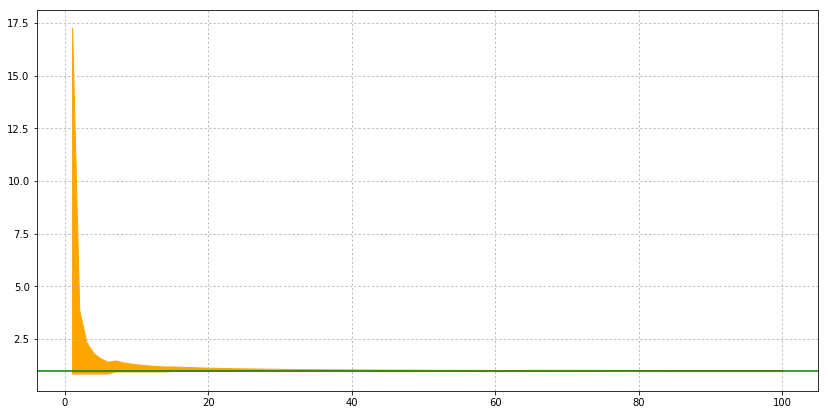

Вероятность попадания истинного значения параметра в интервал:
  p = 0.9492 при n = 10
  p = 0.9474 при n = 100


In [291]:
def lower_bound(sample, alpha, n=0):
    if n:
        return np.max(sample[:n])
    else:
        return np.array([np.max(sample[:i]) for i in range(1, len(sample) + 1)])

def upper_bound(sample, alpha, n=0):
    if n:
        return np.max(sample[:n]) / mt.pow(1 - alpha, 1 / n)
    else:
        return np.array([np.max(sample[:i]) / mt.pow(1 - alpha, 1 / i)
                             for i in range(1, len(sample) + 1)])
                                                
#используем ту же самую выборку

ci_plot(theta, sample, sample_size, lower_bound, upper_bound, alpha)

probability_estimate(num_samples, sample_size, theta, alpha, n_1, n_2, 1)

Доверительный интервал построенный на статистике $X_{(n)}$ самый узкий -> он наилучший из трех предложенных.

#### Задача 3: $X_1 \dots X_{100} \sim С(\theta, 1)$

$\theta \in \left( \hat{\mu} - \frac{\pi}{2\sqrt{n}} U_{\frac{1+\alpha}{2}},\hat{\mu} + \frac{\pi}{2\sqrt{n}} U_{\frac{1+\alpha}{2}} \right)$

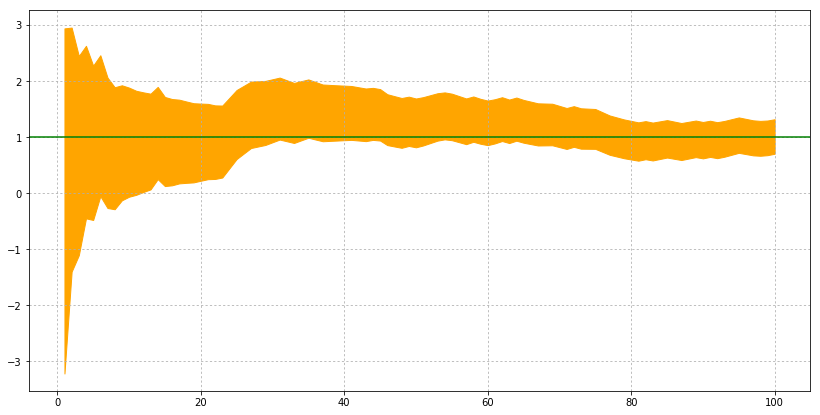

Вероятность попадания истинного значения параметра в интервал:
  p = 0.9177 при n = 10
  p = 0.9492 при n = 100


In [283]:
def lower_bound(sample, alpha, n=0):
    if n:
        return np.median(sample[:n]) - (sps.norm.ppf((1 + alpha) / 2) 
                                        * (mt.pi / (2 * mt.sqrt(n))))
    else:
        return np.array([np.median(sample[:i]) - (sps.norm.ppf((1 + alpha) / 2) 
                                                  * (mt.pi / (2 * mt.sqrt(i)))) 
                             for i in range(1, len(sample) + 1)])
    
def upper_bound(sample, alpha, n=0):
    if n:
        return np.median(sample[:n]) + (sps.norm.ppf((1 + alpha) / 2) 
                                       * (mt.pi / (2 * mt.sqrt(n))))
    else:
        return np.array([np.median(sample[:i]) + (sps.norm.ppf((1 + alpha) / 2) 
                                                  * (mt.pi / (2 * mt.sqrt(i)))) 
                            for i in range(1, len(sample) + 1)])

sample = sps.cauchy.rvs(theta, 1, sample_size)

ci_plot(theta, sample, sample_size, lower_bound, upper_bound, alpha)

probability_estimate(num_samples, sample_size, theta, alpha, n_1, n_2, 3)

#### Задача 4: $X_1 \dots X_{100} \sim Pois(\theta)$

$\theta \in \left( \overline{X} - \sqrt{\frac{\overline{X}}{n}} U_{\frac{1+\alpha}{2}},\overline{X} + \sqrt{\frac{\overline{X}}{n}} U_{\frac{1+\alpha}{2}}\right)$

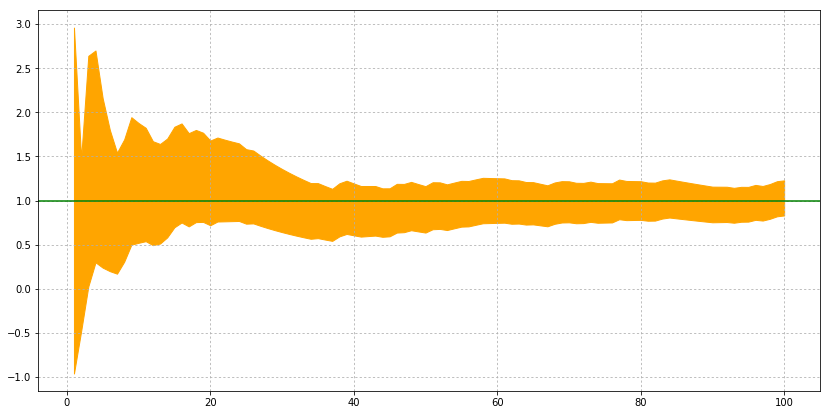

Вероятность попадания истинного значения параметра в интервал:
  p = 0.9229 при n = 10
  p = 0.9455 при n = 100


In [284]:
def lower_bound(sample, alpha, n=0):
    if n:
        return np.mean(sample[:n]) - (mt.sqrt(np.mean(sample[:n]) / n)
                                      * sps.norm.ppf((1 + alpha) / 2))
    else:
        return np.array([np.mean(sample[:i]) - (mt.sqrt(np.mean(sample[:i]) / i)
                                                * sps.norm.ppf((1 + alpha) / 2)) 
                             for i in range(1, len(sample) + 1)])
    
def upper_bound(sample, alpha, n=0):
    if n:
        return np.mean(sample[:n]) + (mt.sqrt(np.mean(sample[:n]) / n)
                                      * sps.norm.ppf((1 + alpha) / 2))
    else:
        return np.array([np.mean(sample[:i]) + (mt.sqrt(np.mean(sample[:i]) / i)
                                                * sps.norm.ppf((1 + alpha) / 2)) 
                             for i in range(1, len(sample) + 1)])

sample = sps.poisson.rvs(theta, size=sample_size)

ci_plot(theta, sample, sample_size, lower_bound, upper_bound, alpha)

probability_estimate(num_samples, sample_size, theta, alpha, n_1, n_2, 4)

#### Задача 5: $X_1 \dots X_{100} \sim Г(\theta, \lambda)$

$\lambda$ известно - $\theta \in \left( \overline{X} - U_{\frac{1+\alpha}{2}} \frac{\overline{X}}{\sqrt{\lambda n}},\overline{X} + U_{\frac{1+\alpha}{2}} \frac{\overline{X}}{\sqrt{\lambda n}} \right)$